# Problem 1 Solution:

$\text{Proj}_C(y)$ defines that any point $y \notin C$ is first projected to the nearest point in set $C$ by using $\text{Proj}_C(y) = \text{argmin}_x ||y-x||^2$ 

A point $x \in C$ is more closer to the projected point $\text{Proj}_C(y)$ than it is to a point $y \notin C$. This implies that

$||x_{n+1} - x ||^2 = ||\text{Proj}_C(x_n - \gamma_n s_n)- x ||^2 \le || x_n - x ||^2 - 2 \gamma_n ( f(x_n)-f(x)) + \gamma_n^2 ||s_n||^2$

The distance between the point $(x_n - \gamma_n s_n)$ and the projected point $x_{n+1}$ in set $C$ can be computed by using $|| x_{n+1} - (x_n - \gamma_n s_n) ||^2$. If the projected point is obtained via the orthogonal projection, then it is located at the boundary of the set $C$, we can rewrite above inequality as:

$||x_{n+1} - x ||^2 \le || x_n - x ||^2 - 2 \gamma_n ( f(x_n)-f(x)) - || x_{n+1} - (x_n - \gamma_n s_n) ||^2 + \gamma_n^2 ||s_n||^2$

Fundamental inequality is the only part to be adapted to check the convergence of projected subgradient. Boundedness of sequence of iterates $\{x_n\}$, sub-differentials and function values follows the same method as described in lectures for the convergence of subgradient method.

# Problem 2 Solution:

Since for the projected sub-gradient

$||x_{n+1} - x ||^2 = ||\text{Proj}_C(x_n - \gamma_n s_n)- x ||^2 \le || x_n - x ||^2 - 2 \gamma_n ( f(x_n)-f(x)) + \gamma_n^2 ||s_n||^2$

using $\gamma_n := \frac{f(x_n) - m}{||S_n||^2}$ in above inquality we get

$||x_{n+1} - x ||^2  \le || x_n - x ||^2 - 2 \left( \frac{f(x_n) - m}{||s_n||^2}\right) ( f(x_n)-f(x)) + \left( \frac{f(x_n) - m}{||s_n||^2}\right)^2 ||s_n||^2$


In $f(x)$, $x$ denotes the optimium point  $\bar{x}$ that minimizes the objective function, $x=\bar{x}$
And $f(x)=m$

$||x_{n+1} - \bar{x} ||^2  \le || x_n - \bar{x} ||^2 - 2 \left( \frac{f(x_n) - f(\bar{x})}{||s_n||^2}\right) ( f(x_n)-f(\bar{x})) +  \frac{(f(x_n) - m)^2}{||s_n||^2}$


$||x_{n+1} - x ||^2  \le || x_n - x ||^2 - 2 \frac{(f(x_n) - f(\bar{x}) )^2}{||s_n||^2} +  \frac{(f(x_n) - f(\bar{x})^2}{||s_n||^2}$

Define above inequality for $n=0,...,N-1$ and summing those result in

$||x_{N} - \bar{x} ||^2  \le || x_0 - \bar{x} ||^2 - \sum_{n=0}^{N-1} \frac{(f(x_n) - f(\bar{x}) )^2}{||s_n||^2} $

Which leads to 

$\sum_{n=0}^{N-1} \frac{(f(x_n) - f(\bar{x}) )^2}{||s_n||^2} + ||x_{N} - \bar{x} ||^2  \le || x_0 - \bar{x} ||^2 $


Relationship between $||x_{N} - \bar{x} ||^2$ and $\sum_{n=0}^{N-1} (f(\bar{x})-m))^2 / ||s_n||^2$?


# Problem 3: shortest path

**Steps for sub-gradient algorithm implementation**

1. Suppose $C$ is a closed ball of radius 3 in $\mathbb{R}^2$ centred at $(0,0)$. Distance from start point $a=(0,0)$ to target point $b=(1,2)$ is 2.23. Therefore we limit the search of shortest path within the ball of radius 3 centred at point (0,0) for convenience.
2. Generate $N-1$ random points within a sphere of radius 3 in $\mathbb{R}^2$. These N-1 points together with the starting and ending points are saved as $\boldsymbol{x}_0$. 
3. Compute sub-gradient at each individual point $\partial f(\boldsymbol{x}_k)$
5. Compute the step size during the $n^{\text{th}}$ iteration by $\gamma_n = \frac{a}{(b+n)||S_n||}$
6. Projection is done by scaling the initial path by its norm.


## Implementation of Sub-gradient method for shortest path search:

In [376]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

#### Function: Random path generator

In [377]:
def randompath(N,a,b):
    numSteps = N+1
    x = np.linspace(a[0], b[0], numSteps)
    y = np.linspace(a[1], b[1], numSteps)
    noise = np.random.normal(0,1,numSteps)
    yNoisy = y + 20 * noise - 10
    y[1:N] = yNoisy[1:N] 
    path = [x,y] # This one is a list, array[list] can also be used
    A = np.asarray(path)
    return A

#### Function: Objective Function

In [378]:
def fv(path,N):
    fvalue = 0;
    for x in range(N):
        xpt = path[0][x+1] - path[0][x]
        ypt = path[1][x+1] - path[1][x]
        fvalue += np.sqrt(xpt**2 + ypt**2)
    return fvalue

#### Function: Calculate sub-gradient of function $f(\boldsymbol{x})$, here $\boldsymbol{x}$ is a point during the $n^{th}$ iteration:

Let $f(\boldsymbol{x}) = f(\boldsymbol{x_1}) + f(\boldsymbol{x_2}) +,...,+ f(\boldsymbol{x_N}) = \sum_{k=1}^N ||\boldsymbol{x}_k - \boldsymbol{x}_{k-1}||$.

Where each $\boldsymbol{x}_k = (x_{k,1},x_{k,2})$ for $k=1,...,N$

Then the sub-gradient of $\partial f(\boldsymbol{x})$ is a matrix of size $N \times 2$. Each row $S_k$ of the gradient matrix $S$ is computed as $S_k = \partial f(\boldsymbol{x}_k) = \left(  \frac{\partial f(\boldsymbol{x}_k)}{\partial x_{k,1}}, \frac{\partial f(\boldsymbol{x}_k)}{\partial x_{k,2}} \right) $

For Euclidean norm, the sub-gradients are computed as follows:

1. If $ \boldsymbol{x_k} - \boldsymbol{x_{k-1}} = \boldsymbol{0}$, then sub-gradient $S$ can be any point within a sphere of unit radius in $\mathbb{R}^2$.

2. If $ \boldsymbol{x_k} - \boldsymbol{x_{k-1}} \neq \boldsymbol{0}$, then sub-gradient can be computed uniquely by using $S_k = (S_{k,0}, S_{k,1}) = \partial f(\boldsymbol{x_k}) =\frac{\boldsymbol{x_k} - \boldsymbol{x_{k-1}}}{||\boldsymbol{x_k} - \boldsymbol{x_{k-1}}||} $

In [379]:
def sg(path,N):
    S = np.zeros((2,N))
    for x in range(N):
        xpt = path[0][x+1] - path[0][x]
        ypt = path[1][x+1] - path[1][x]
        S[0][x] = xpt/np.sqrt(xpt**2 + ypt**2)
        S[1][x] = ypt/np.sqrt(xpt**2 + ypt**2)
        # check if any component is zero
        if xpt == 0:
            S[0][x] = 0.5;
        if ypt == 0:
            S[1][x] = 0.5;
    return S

#### Function1: Projected sub-gradient method using a step  $\gamma_n = \frac{a}{(b-a+n)||S_n||^2}$

Here $n=1,2,...$ deontes iteration, Both $a$ and $b$ are positive real numbers. Let $S_n = S $

then $||S|| = \sqrt{ \sum_{k=1}^{N} (S_{k,0}^2+S_{k,1}^2) } $

In [380]:
def sub_gradient_1(maxitr,N,a,b,sa,sb):
# function use the basic step definition
    
    radius = 10
    x_n = randompath(N,a,b)
    x0 = np.copy(x_n)
    scale = np.linalg.norm(np.squeeze(np.asarray(x_n)))
    x_n = x_n/scale;
    x0=x0/scale;
    
    n = 0
    #x_np1 = tuple(x0[:])
    S = sg(x0,N)
    x_opt = x0;
    f_opt = fv(x0,N)
    fval = np.zeros(maxitr+1)
    gammaA = np.zeros(maxitr+1)
    while 1:
        fval[n] = fv(x_n*scale,N)
        gamma =  sa/((sb+n+1) * np.linalg.norm(np.squeeze(np.asarray(S)))) #(S.mean(1)
        temp = x_n[:,1:] - gamma * S
        # project here
        x_n[:,1:-1] = temp[:,:-1]
        
        if fv(x_n,N) < f_opt:
            n_opt = n
            f_opt = fv(x_np1,N)
            x_opt = np.copy(x_n)
        
        # Ergodic Convergence rate
        gammaA[n] = gamma
        
        # Inequality 1 check
        
        n += 1        
        S = sg(x_n,N)
        if n>maxitr:
            print('Exiting loop at n = {}'.format(n))
            break
    return fval,scale*x_n,scale*x0,gammaA
    #return fval,x_n,x0,gammaA

## Shortest Path

In [381]:
N = 10
a =[0,0]
b =[1,2]
sa = 1
sb = 1
maxitr = 1000
fval,x_np1,x0,gamma =sub_gradient_1(maxitr,N,a,b,sa,sb)


Exiting loop at n = 1001


#### Resultant Shortest path from the sub-gradient method

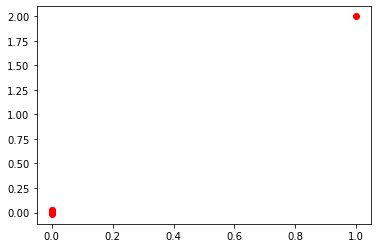

In [382]:
plt.plot(x_np1[0,:], x_np1[1,:], 'ro')

#### Initial Path

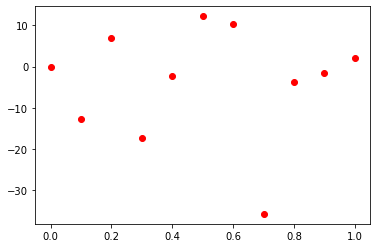

In [383]:
plt.plot(x0[0,:], x0[1,:], 'ro')

#### Function values vs Iterations

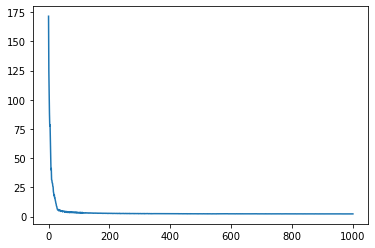

In [384]:
plt.plot(fval)